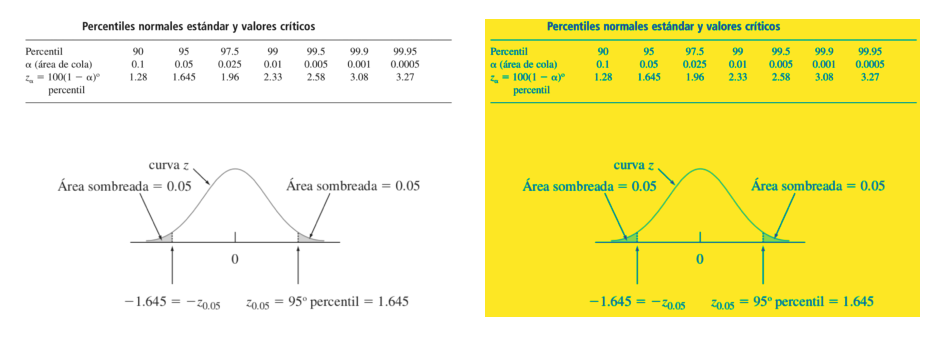

shape: (1492, 2180)
min: 0.0891
max: 0.9999


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('images/image1.png')
image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.imshow(image, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.show()

print(f'shape: {image.shape}')
print(f'min: {round(image.min(), 4)}')
print(f'max: {round(image.max(), 4)}')

In [3]:
# valor más repetido
def mas_repetido(image, value=None, delta=None):   # value: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if value == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep

In [4]:
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

In [5]:
# dividir matriz en sub matrices
def dividir(matrix, n):
    sub_matrices = []
    
    for i in range(0, matrix.shape[0], n):
        for j in range(0, matrix.shape[1], n):
            submatriz = matrix[i:i+n, j:j+n]
            sub_matrices.append(submatriz)
    return sub_matrices

# sub_images = dividir(image, 100)

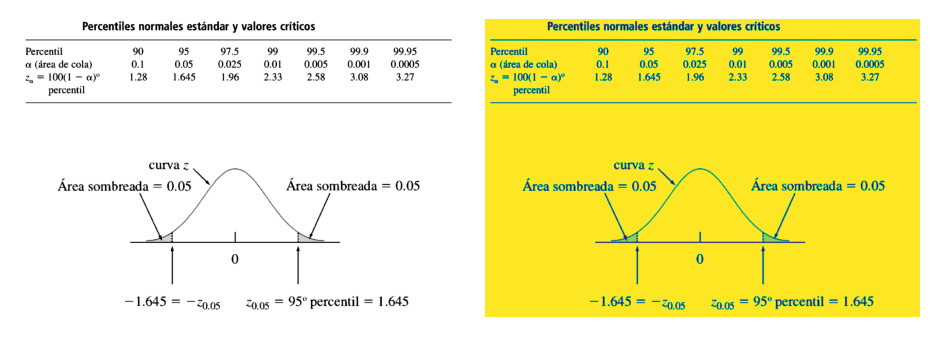

In [6]:
# cambiar color mas oscuro y mas repetido (texto) a negro
def toBlack(image, delta1, delta2):
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0
    return image

toBlack_image = toBlack(image, 0.05, 0.5)

plt.subplot(1, 2, 1)
plt.imshow(toBlack_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.imshow(toBlack_image, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.show()

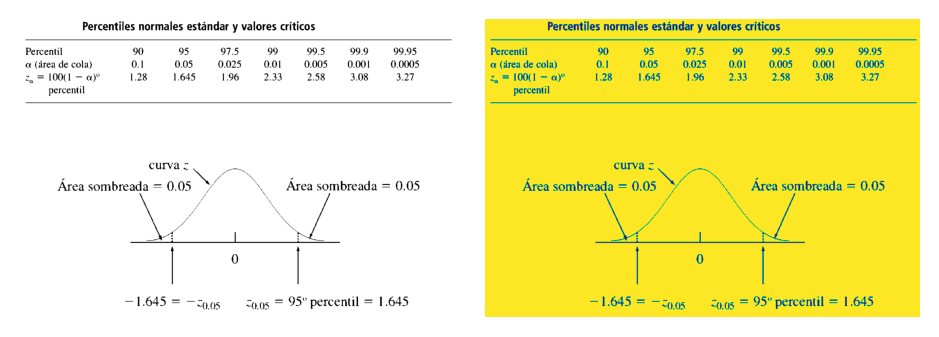

In [7]:
# suponiendo que todos los oscuros ya se convirtieron a 0, convertir todo el resto en 1
def toWhite(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
    return image

toWhite_image = toWhite(image)

plt.subplot(1, 2, 1)
plt.imshow(toWhite_image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.imshow(toWhite_image, vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()

plt.show()